Dataset Content
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

The various features of the cleaned dataset are explained below:

--> Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

--> Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

--> Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.


--> Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores 

--> information about the departure time and have 6 unique time labels.


--> Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

--> Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.


--> Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.


--> Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.


--> Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.


--> Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.


--> Price: Target variable stores information of the ticket price.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("C:/Users/Ashyy/OneDrive/Desktop/Flight_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.shape

(300153, 12)

In [4]:
df.airline.value_counts()

# vistara has most number of value counts and Air_India has second most number of value counts,
#                                    where as Spice Jet has least number of value counts

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [5]:
df.dtypes

# most of the presented features are having object data type 

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [6]:
df.isnull().sum()

## There are no Null Value Present in the Dataset 

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.describe().T

## here 'unnamed: 0' Feature column is nothing but the indexing of all the information available which we will drop later 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


##### 

## Categorical Variable Analysis

In [8]:
# All possible categoric features
cat_features = [column for column in df.columns \
                if df[column].dtype in ["object", "category", "bool"]]

print("Categorical Features :- \n",cat_features)


# Numeric but categoric features
num_but_cat_features = [column for column in df.columns 
                        if (df[column].dtype in ["int64", "float64"]) and (df[column].nunique() < 9)]
print("Numerical but Categorical Features :- \n",num_but_cat_features)


# Categoric but cardinal features
cat_but_card_features = [column for column in df.columns 
                         if (df[column].dtype in ["object", "category", "bool"]) and (df[column].nunique() > 36)]




# Categoric features (final situation for categoric features)
categoric_features = cat_features + num_but_cat_features
categoric_features = [column for column in categoric_features if column not in cat_but_card_features]

# basically we re removing the flight column as it has flight number with categorical value in it 
# but in real it is not categorical 
df[categoric_features]

Categorical Features :- 
 ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
Numerical but Categorical Features :- 
 []


,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business


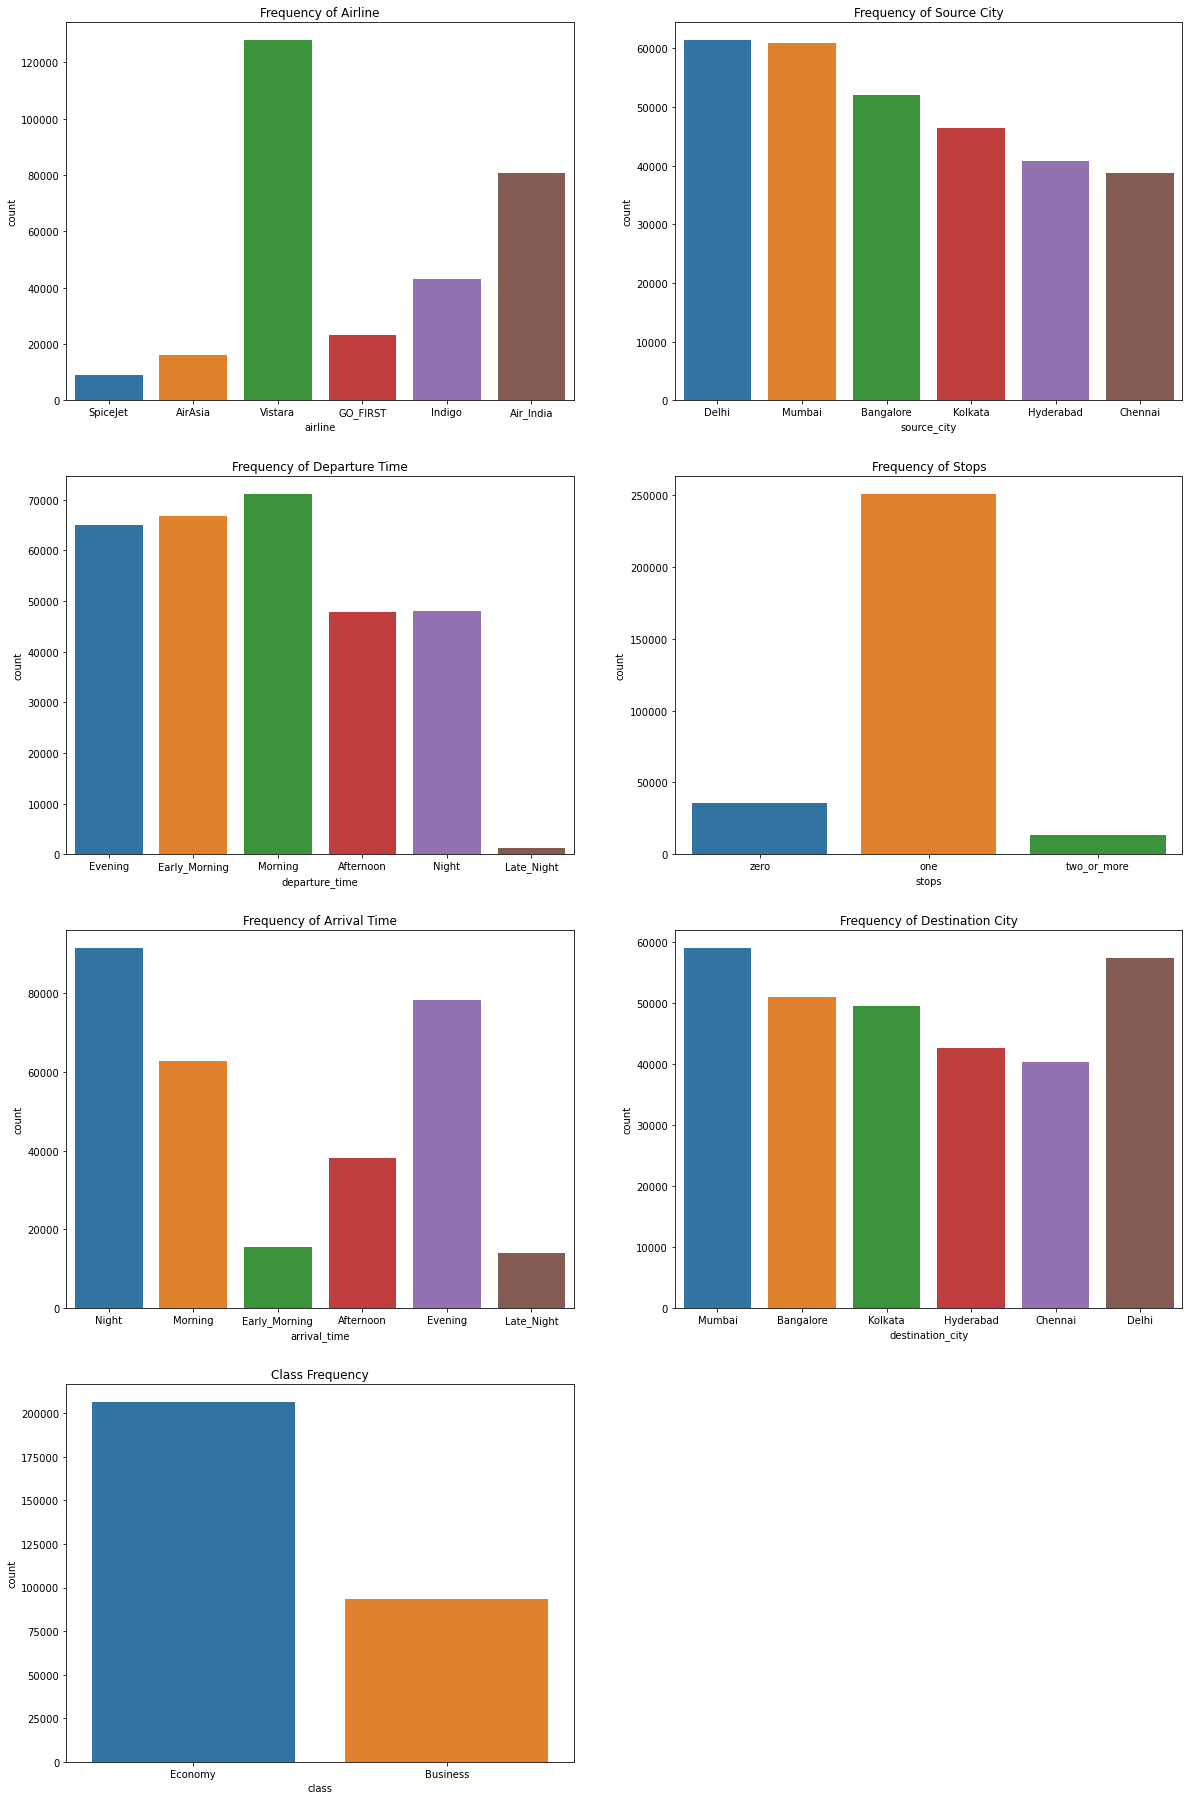

In [9]:
# Visualizations of categoric features with countplot using subplots
plt.figure(figsize=(20,32))

plt.subplot(4, 2, 1)
sns.countplot(x=df["airline"], data=df)
plt.title("Frequency of Airline")

plt.subplot(4, 2, 2)
sns.countplot(x=df["source_city"], data=df)
plt.title("Frequency of Source City")

plt.subplot(4, 2, 3)
sns.countplot(x=df["departure_time"], data=df)
plt.title("Frequency of Departure Time")

plt.subplot(4, 2, 4)
sns.countplot(x=df["stops"], data=df)
plt.title("Frequency of Stops")
plt.subplot(4, 2, 5)
sns.countplot(x=df["arrival_time"], data=df)
plt.title("Frequency of Arrival Time")

plt.subplot(4, 2, 6)
sns.countplot(x=df["destination_city"], data=df)
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 7)
sns.countplot(x=df["class"], data=df)
plt.title("Class Frequency")

plt.show()

##  Numerical Variable Analysis

In [10]:
# Numeric features in dataframe
numeric_features = [column for column in df.columns if (df[column].dtype in ["int64", "float64"]) and (column not in categoric_features)]

df[numeric_features]

,Unnamed: 0,duration,days_left,price
0,0,2.17,1,5953
1,1,2.33,1,5953
2,2,2.17,1,5956
3,3,2.25,1,5955
4,4,2.33,1,5955
...,...,...,...,...
300148,300148,10.08,49,69265
300149,300149,10.42,49,77105
300150,300150,13.83,49,79099
300151,300151,10.00,49,81585


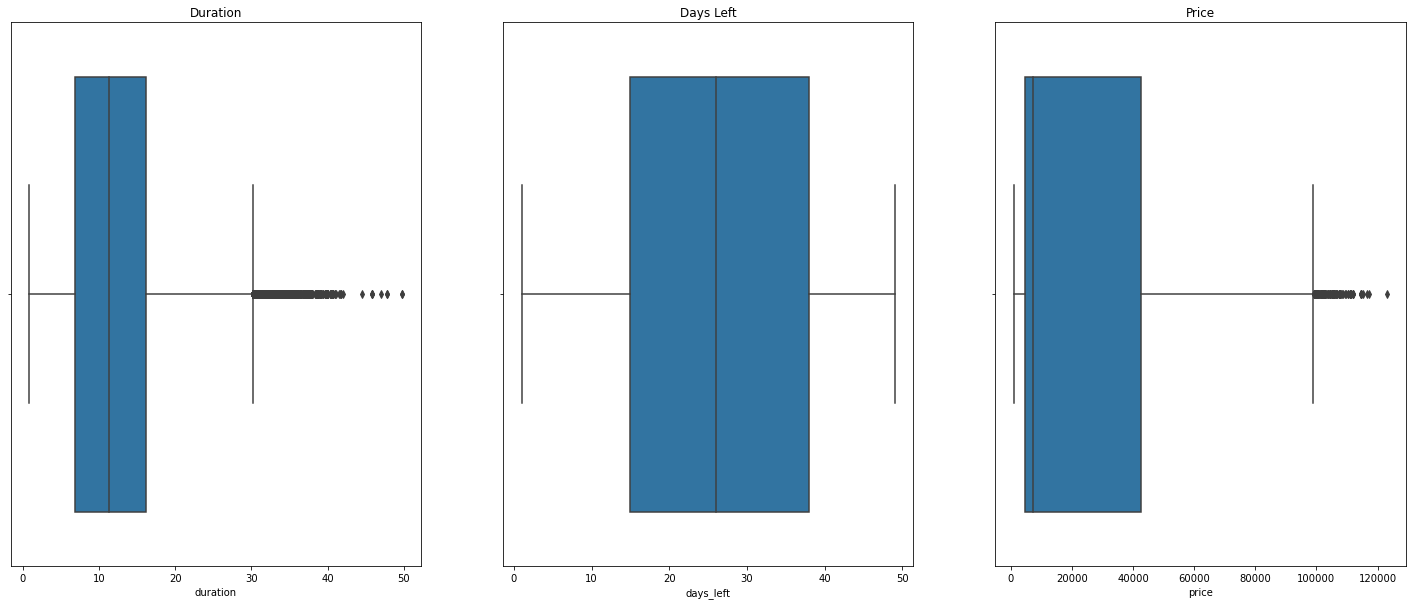

In [11]:
# Visualizations of numeric features with boxplot
plt.figure(figsize=(25,10))

plt.subplot(1, 3, 1)
sns.boxplot(x=df["duration"], data=df)
plt.title("Duration")

plt.subplot(1, 3, 2)
sns.boxplot(x=df["days_left"], data=df)
plt.title("Days Left")

plt.subplot(1, 3, 3)
sns.boxplot(x=df["price"], data=df)
plt.title("Price")

plt.show()


# Duration and Price have outliers it seems , but that can be true outliers as 
# flight prices may vary most of the time as it can be high or low in times as per some condition
# also about the flight duration that can also vary as sometimes flight can take more time
#                                   as if there is some unconditional weather condition

## Target Variabel Analysis 

In [12]:
target = "price"

for feature in categoric_features:
    print("\n##################################")
    analysis = df.groupby(feature).agg({target : ["mean"]})
    print('Analysis with "{}":\n\n'.format(feature), analysis)


##################################
Analysis with "airline":

                   price
                   mean
airline                
AirAsia     4091.072742
Air_India  23507.019112
GO_FIRST    5652.007595
Indigo      5324.216303
SpiceJet    6179.278881
Vistara    30396.536302

##################################
Analysis with "source_city":

                     price
                     mean
source_city              
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839

##################################
Analysis with "departure_time":

                        price
                        mean
departure_time              
Afternoon       18179.203331
Early_Morning   20370.676718
Evening         21232.361894
Late_Night       9295.299387
Morning         21630.760254
Night           23062.146808

##################################
Analysis with "stops":

                     price
  

## Correlation Analysis

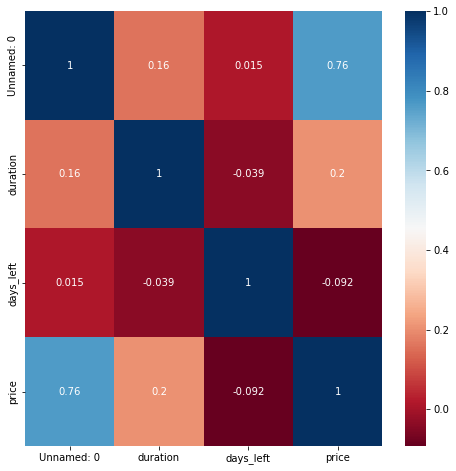

In [13]:
corr = df[numeric_features].corr()

# Heatmap to look at correlation
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True ,cmap="RdBu")
plt.show()

In [14]:
# If the correlation value is above 90%, I drop it
corr_matrix = df[numeric_features].corr().abs()
corr_upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype("bool"))
drop_list = [column for column in corr_upper_triangle_matrix.columns if any(corr_upper_triangle_matrix[column]>0.90)]

print("the length of drop list : ", len(drop_list))

the length of drop list :  0


## Data Pre-Processing 

In [15]:
# Since "stop" and "class" variables are ordinal variables, the encoding process should be accordingly.
df["stops"] = df["stops"].replace({'zero': 0,
                                   'one': 1,
                                   'two_or_more': 2})

df["class"] = df["class"].replace({'Economy': 0,
                                   'Business': 1})


In [16]:
# One Hot Encoding
dummies_variables = ["airline", "source_city", "departure_time", "arrival_time", "destination_city"]
dummies = pd.get_dummies(df[dummies_variables], drop_first= True)

df = pd.concat([df, dummies], axis=1)
df = df.drop(["airline", "source_city", "departure_time", "arrival_time", "destination_city"],axis=1)

In [17]:
# Drop cardinal variables because they don't hold 
df.drop(cat_but_card_features, axis=1, inplace=True)

# Drop "Unnamed: 0"
df.drop("Unnamed: 0", axis=1, inplace=True)
# Scaling of Numerical Features
scaler = MinMaxScaler()

num_vars = ['duration', 'days_left', 'price']
df[num_vars] = scaler.fit_transform(df[num_vars])

df.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0.027347,0.0,0.039749,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0.030612,0.0,0.039749,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0.027347,0.0,0.039773,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0.028980,0.0,0.039765,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.030612,0.0,0.039765,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


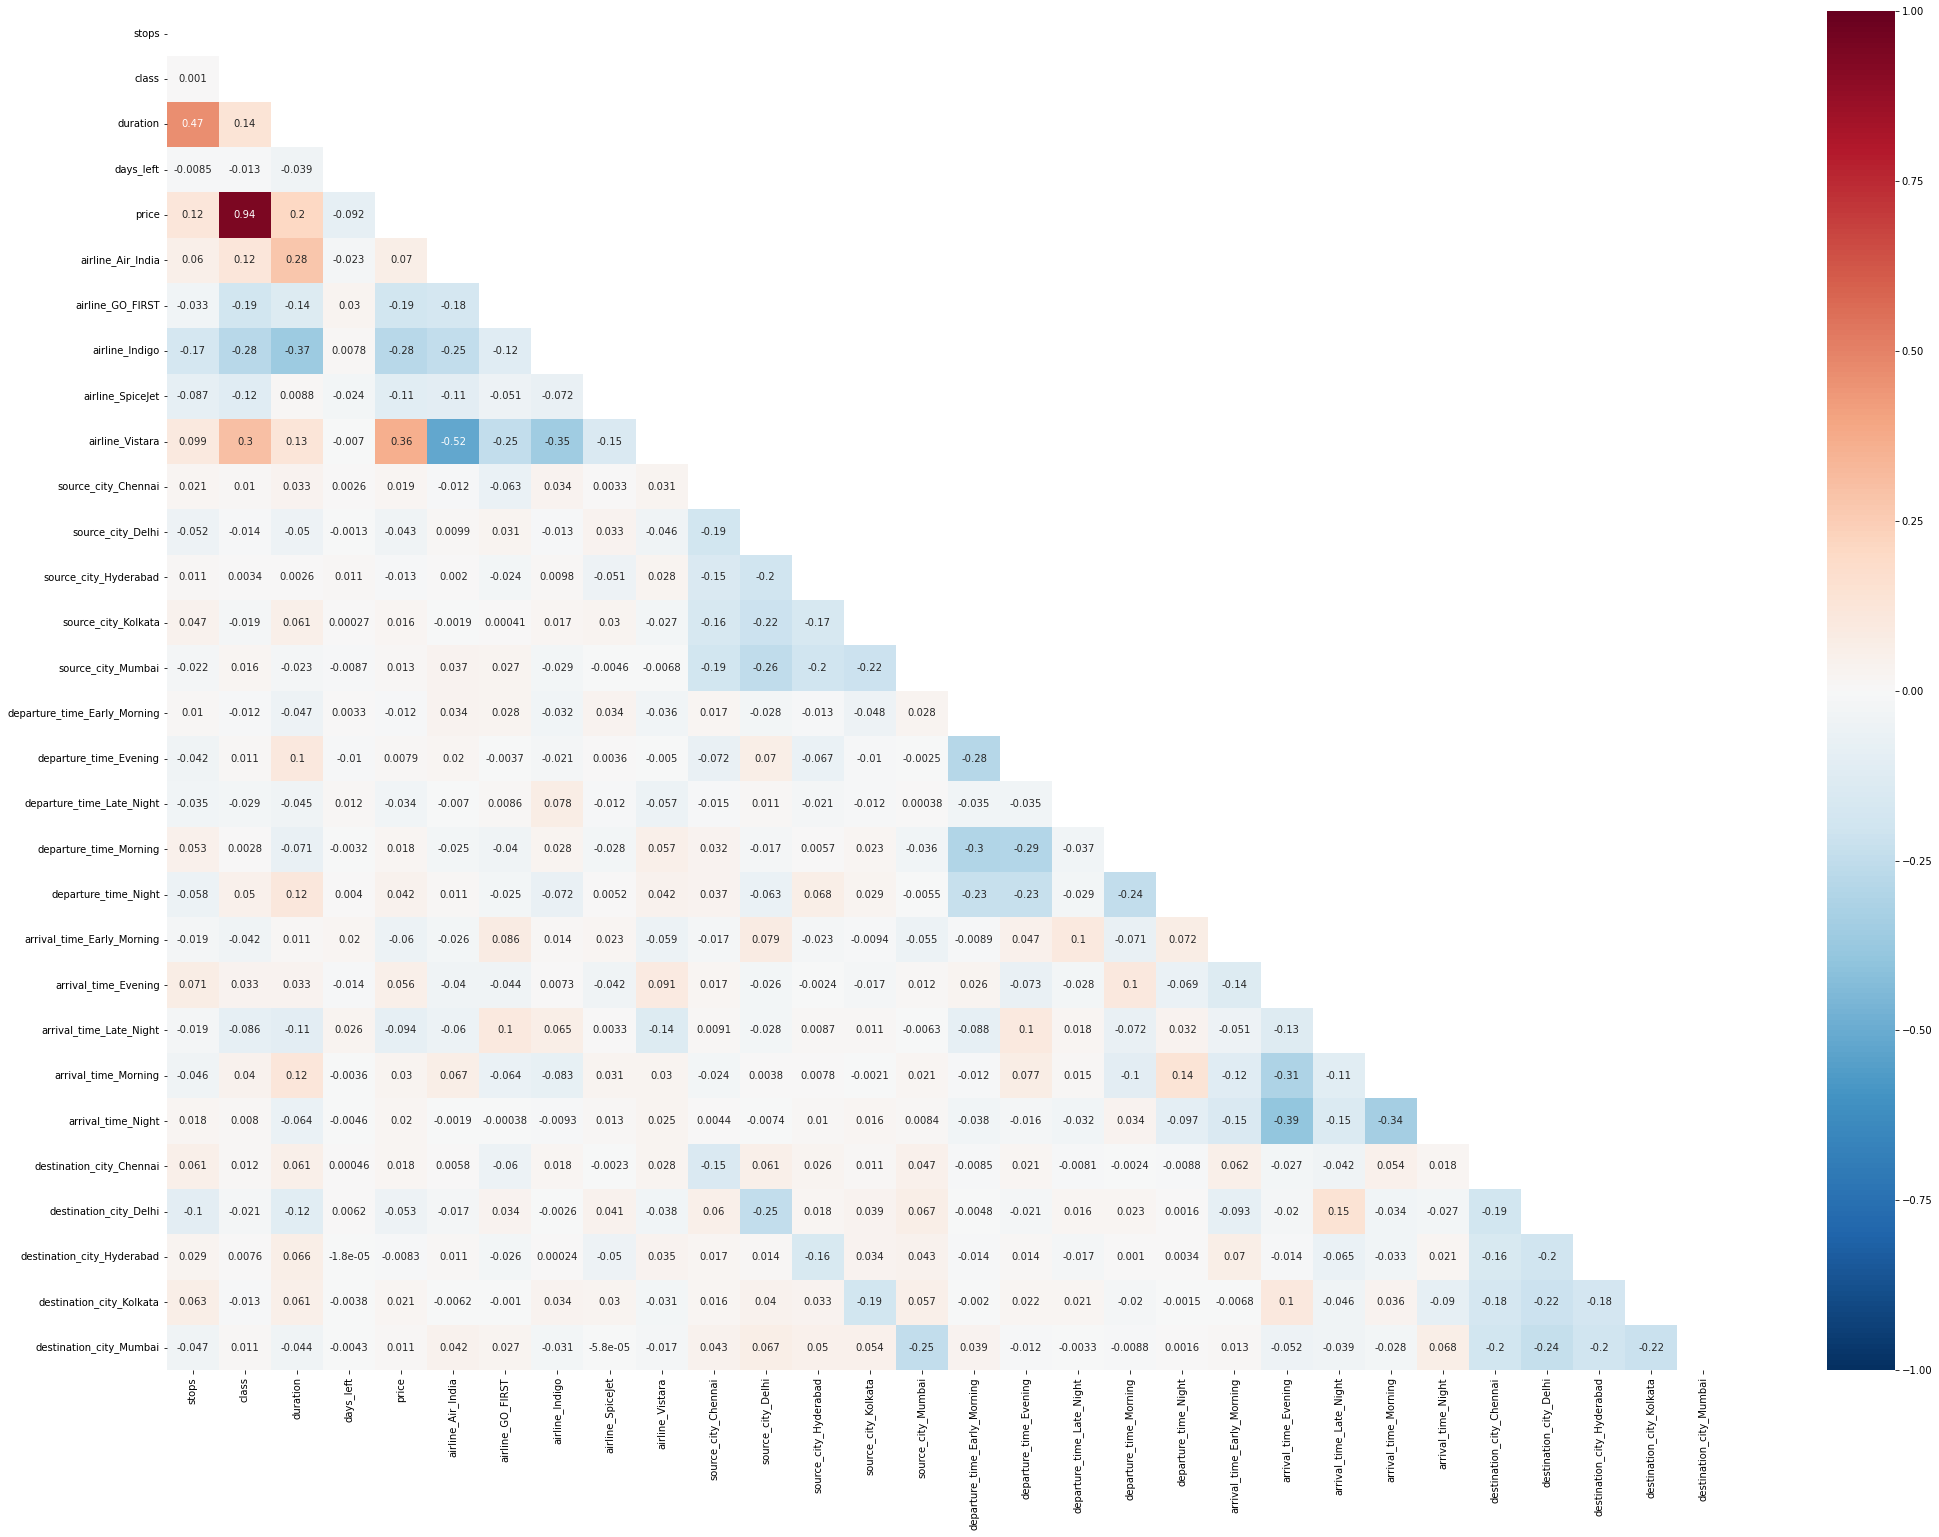

In [18]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize = (35, 25))
sns.heatmap(df.corr(), data=df, mask=mask, annot=True, vmin=-1.0, vmax=1.0, center=0, cmap='RdBu_r')
plt.show()

## Model Building

In [19]:
# spliting training and testing part 

Y = df["price"] ## target variable 
X = df.drop(["price"], axis=1) ## feature columns

## Train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 8)

In [20]:
# Defining a user defined function to measure all error and score values 

def measure(Y_test,y_pred):
  print('Mean Absolute Error (MAE): ', round(mean_absolute_error(Y_test, y_pred), 3))
  print('Mean Squared Error (MSE): ', round(mean_squared_error(Y_test, y_pred), 3))
  print('Root Mean Squared Error (RMSE): ', round(np.sqrt(mean_squared_error(Y_test, y_pred)), 3))
  print('R2 Score: ', round(r2_score(Y_test, y_pred), 5))
  print('Root Mean Squared Log Error (RMSLE): ', round(np.log(np.sqrt(mean_squared_error(Y_test, y_pred))), 3))

In [21]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
print("Model Name :-",modelLR)
%time modelLR.fit(X_train,Y_train)
y_pred = modelLR.predict(X_test)
# lm.intercept_
# lm.coef_ 

print(measure(Y_test,y_pred))

Model Name :- LinearRegression()
CPU times: total: 625 ms
Wall time: 238 ms
Mean Absolute Error (MAE):  0.037
Mean Squared Error (MSE):  0.003
Root Mean Squared Error (RMSE):  0.055
R2 Score:  0.91095
Root Mean Squared Log Error (RMSLE):  -2.891
None


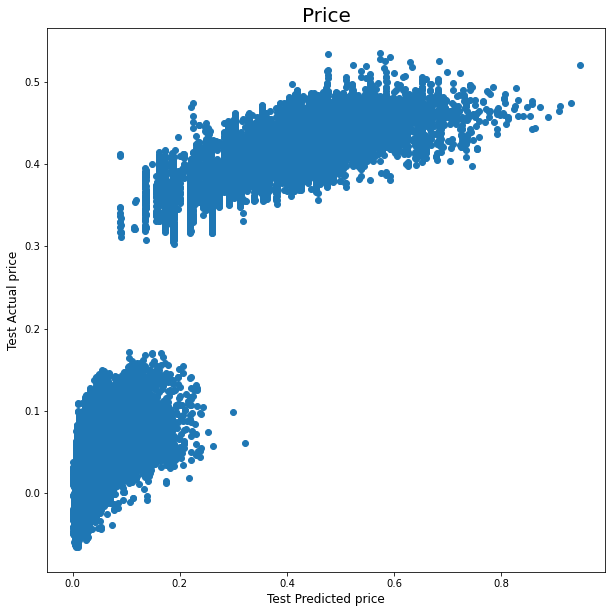

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, y_pred)
plt.title("Price",fontsize=20)
plt.xlabel('Test Predicted price',fontsize=12)
plt.ylabel('Test Actual price',fontsize=12)
plt.show()

In [23]:
from sklearn.linear_model import Ridge, Lasso
modelRE = Ridge()
print("Model Name :-",modelRE)
%time modelRE.fit(X_train,Y_train)
y_pred = modelRE.predict(X_test)

print(measure(Y_test,y_pred))

Model Name :- Ridge()
CPU times: total: 141 ms
Wall time: 57.2 ms
Mean Absolute Error (MAE):  0.037
Mean Squared Error (MSE):  0.003
Root Mean Squared Error (RMSE):  0.055
R2 Score:  0.91095
Root Mean Squared Log Error (RMSLE):  -2.891
None


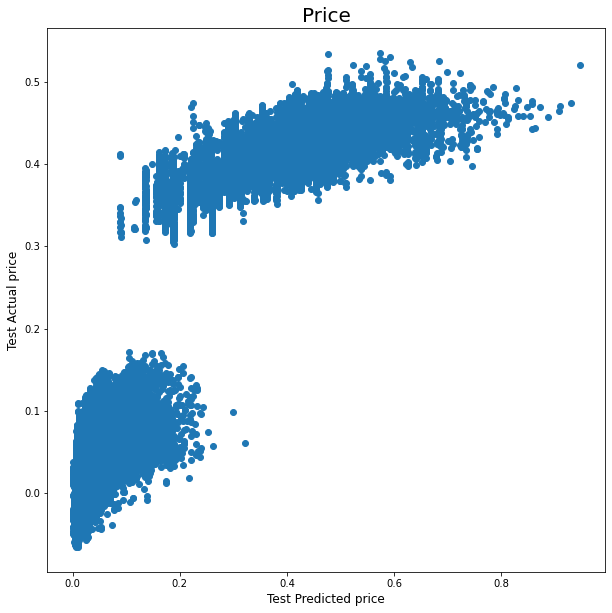

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, y_pred)
plt.title("Price",fontsize=20)
plt.xlabel('Test Predicted price',fontsize=12)
plt.ylabel('Test Actual price',fontsize=12)
plt.show()

In [25]:
from sklearn.linear_model import Lasso
modelL = Lasso(alpha = 0.001)
print("Model Name :-",modelL)
%time modelL.fit(X_train,Y_train)
y_pred = modelL.predict(X_test)

print(measure(Y_test,y_pred))

Model Name :- Lasso(alpha=0.001)
CPU times: total: 188 ms
Wall time: 94 ms
Mean Absolute Error (MAE):  0.036
Mean Squared Error (MSE):  0.003
Root Mean Squared Error (RMSE):  0.057
R2 Score:  0.9073
Root Mean Squared Log Error (RMSLE):  -2.871
None


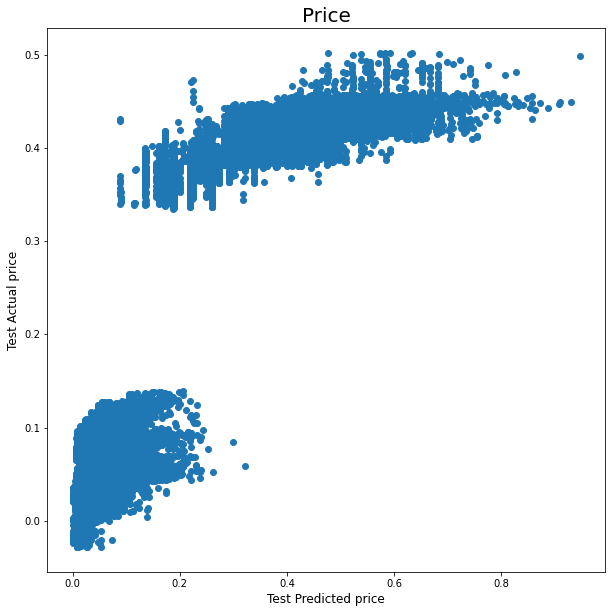

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, y_pred)
plt.title("Price",fontsize=20)
plt.xlabel('Test Predicted price',fontsize=12)
plt.ylabel('Test Actual price',fontsize=12)
plt.show()

In [27]:
from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor()
print("Model Name :- ",modelDTR)

%time modelDTR.fit(X_train,Y_train)
y_pred = modelDTR.predict(X_test)

print(measure(Y_test,y_pred))

Model Name :-  DecisionTreeRegressor()
CPU times: total: 1.06 s
Wall time: 1.07 s
Mean Absolute Error (MAE):  0.01
Mean Squared Error (MSE):  0.001
Root Mean Squared Error (RMSE):  0.029
R2 Score:  0.97591
Root Mean Squared Log Error (RMSLE):  -3.545
None


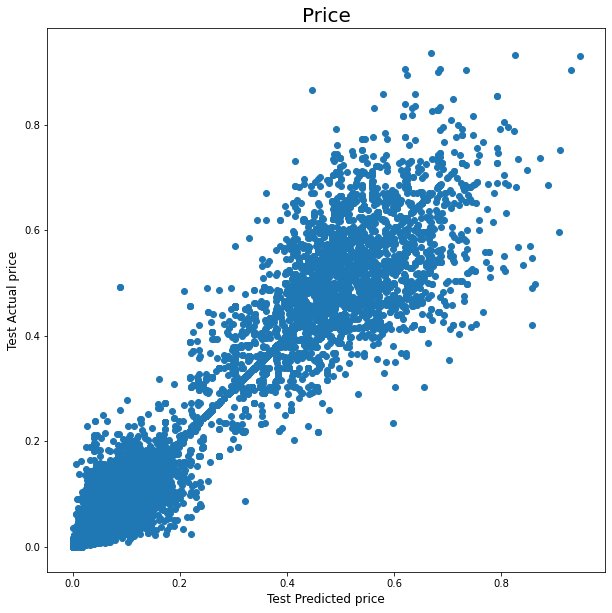

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, y_pred)
plt.title("Price",fontsize=20)
plt.xlabel('Test Predicted price',fontsize=12)
plt.ylabel('Test Actual price',fontsize=12)
plt.show()

In [29]:
from sklearn.ensemble import RandomForestRegressor

modelRFR = RandomForestRegressor()
print("Model Name :- ",modelRFR)
%time modelRFR.fit(X_train,Y_train)
y_pred = modelRFR.predict(X_test)

print(measure(Y_test,y_pred))

Model Name :-  RandomForestRegressor()
CPU times: total: 1min 13s
Wall time: 1min 13s
Mean Absolute Error (MAE):  0.009
Mean Squared Error (MSE):  0.001
Root Mean Squared Error (RMSE):  0.023
R2 Score:  0.98521
Root Mean Squared Log Error (RMSLE):  -3.789
None


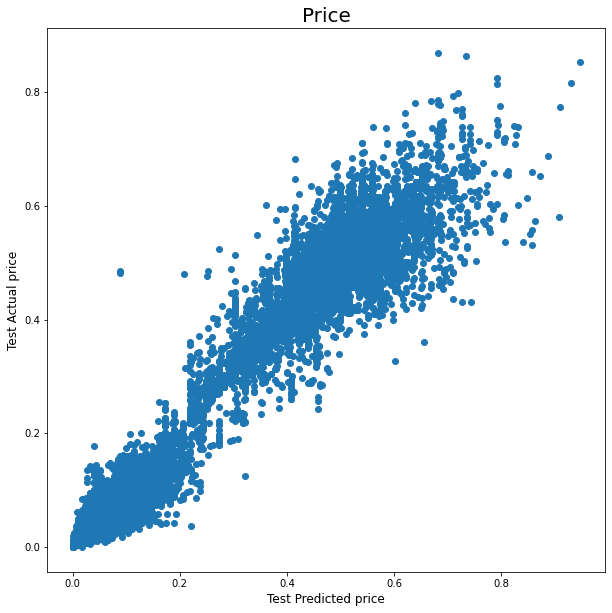

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, y_pred)
plt.title("Price",fontsize=20)
plt.xlabel('Test Predicted price',fontsize=12)
plt.ylabel('Test Actual price',fontsize=12)
plt.show()

#### Out of all the models Random forest scatter plot between the test and predicted values is showing kind of a linear relationship

In [31]:
from sklearn.neighbors import KNeighborsRegressor

modelKNN = KNeighborsRegressor()
print("Model Name :- ",modelKNN)
%time modelKNN.fit(X_train,Y_train)
y_pred = modelKNN.predict(X_test)

print(measure(Y_test,y_pred))

Model Name :-  KNeighborsRegressor()
CPU times: total: 31.2 ms
Wall time: 35 ms
Mean Absolute Error (MAE):  0.016
Mean Squared Error (MSE):  0.001
Root Mean Squared Error (RMSE):  0.031
R2 Score:  0.97146
Root Mean Squared Log Error (RMSLE):  -3.46
None


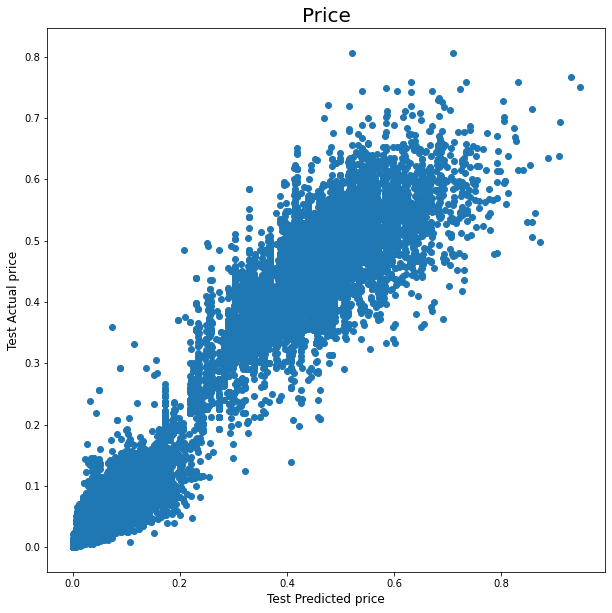

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, y_pred)
plt.title("Price",fontsize=20)
plt.xlabel('Test Predicted price',fontsize=12)
plt.ylabel('Test Actual price',fontsize=12)
plt.show()

In [33]:
from sklearn.ensemble import BaggingRegressor
modelBR = BaggingRegressor()
print("Model Name :- ",modelBR)
%time modelBR.fit(X_train,Y_train)
y_pred = modelBR.predict(X_test)

print(measure(Y_test,y_pred))

Model Name :-  BaggingRegressor()
CPU times: total: 7.84 s
Wall time: 7.83 s
Mean Absolute Error (MAE):  0.009
Mean Squared Error (MSE):  0.001
Root Mean Squared Error (RMSE):  0.024
R2 Score:  0.984
Root Mean Squared Log Error (RMSLE):  -3.75
None


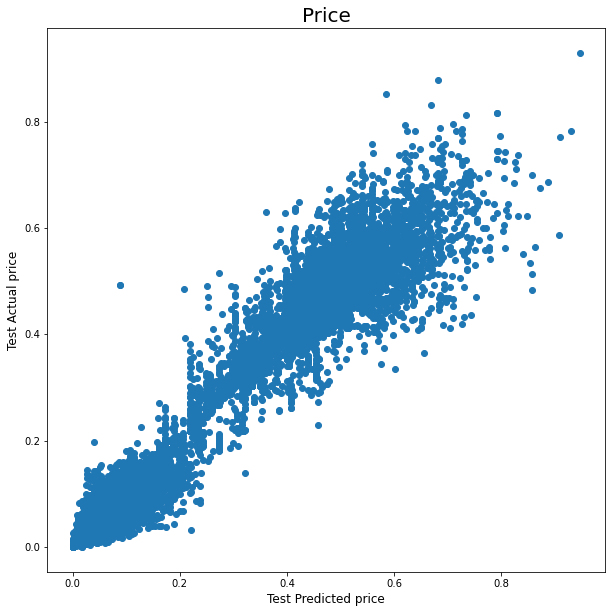

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, y_pred)
plt.title("Price",fontsize=20)
plt.xlabel('Test Predicted price',fontsize=12)
plt.ylabel('Test Actual price',fontsize=12)
plt.show()

#### And Other than Random forest , Bagging Regressor also showing kind of linear relationship between test and predicted values 

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
modelGBR = GradientBoostingRegressor()
print("Model Name :- ",modelGBR)
%time modelGBR.fit(X_train,Y_train)
y_pred = modelGBR.predict(X_test)

print(measure(Y_test,y_pred))

Model Name :-  GradientBoostingRegressor()
CPU times: total: 20.7 s
Wall time: 20.7 s
Mean Absolute Error (MAE):  0.024
Mean Squared Error (MSE):  0.002
Root Mean Squared Error (RMSE):  0.041
R2 Score:  0.9524
Root Mean Squared Log Error (RMSLE):  -3.205
None


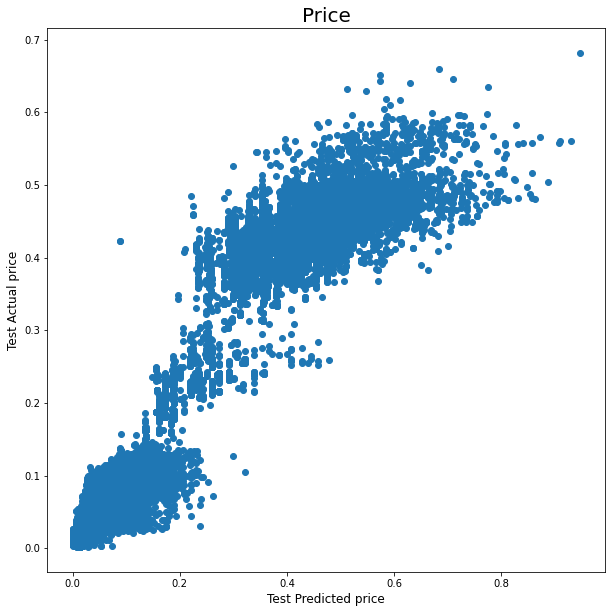

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, y_pred)
plt.title("Price",fontsize=20)
plt.xlabel('Test Predicted price',fontsize=12)
plt.ylabel('Test Actual price',fontsize=12)
plt.show()

#### Hence Random Forest Regressor is the best model we ve got with 98.52% accuracy along with Bagging Regressor having 98.41% accuracy 

#### Where as in both the model error rate are kind of same and the time to train the models were different, So in terms of model training time we can choose Bagging Regressor as our best model too 